In [26]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tipe data Tidak Sesuai : TotalCharges

In [29]:
# Menghitung jumlah sel yang hanya berisi spasi pada kolom TotalCharges
empty_total_charges_count = df[df['TotalCharges'].str.strip() == ''].shape[0]
print(f"Jumlah sel yang hanya berisi spasi pada kolom TotalCharges: {empty_total_charges_count}")

Jumlah sel yang hanya berisi spasi pada kolom TotalCharges: 11


In [30]:
# merubah tipe data TotalCharges
df.replace(' ', 0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [34]:
numeric_col = df.select_dtypes(include=['number'])

<Axes: >

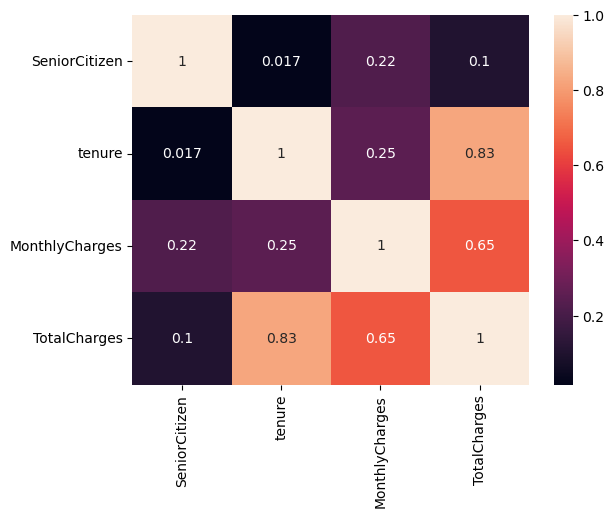

In [59]:
sns.heatmap(numeric_col.corr(), annot=True)

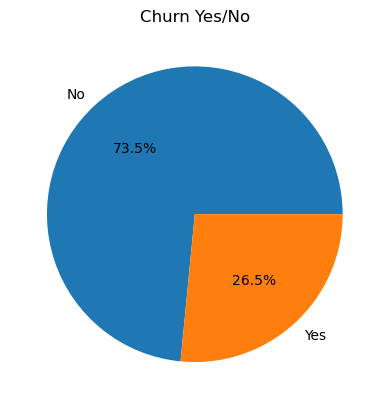

In [36]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Yes/No')
plt.ylabel('')
plt.show()

inbalanced data, jumlah pelanggan yang tidak churn jauh lebih banyak dibandingkan pelanggan yang churn

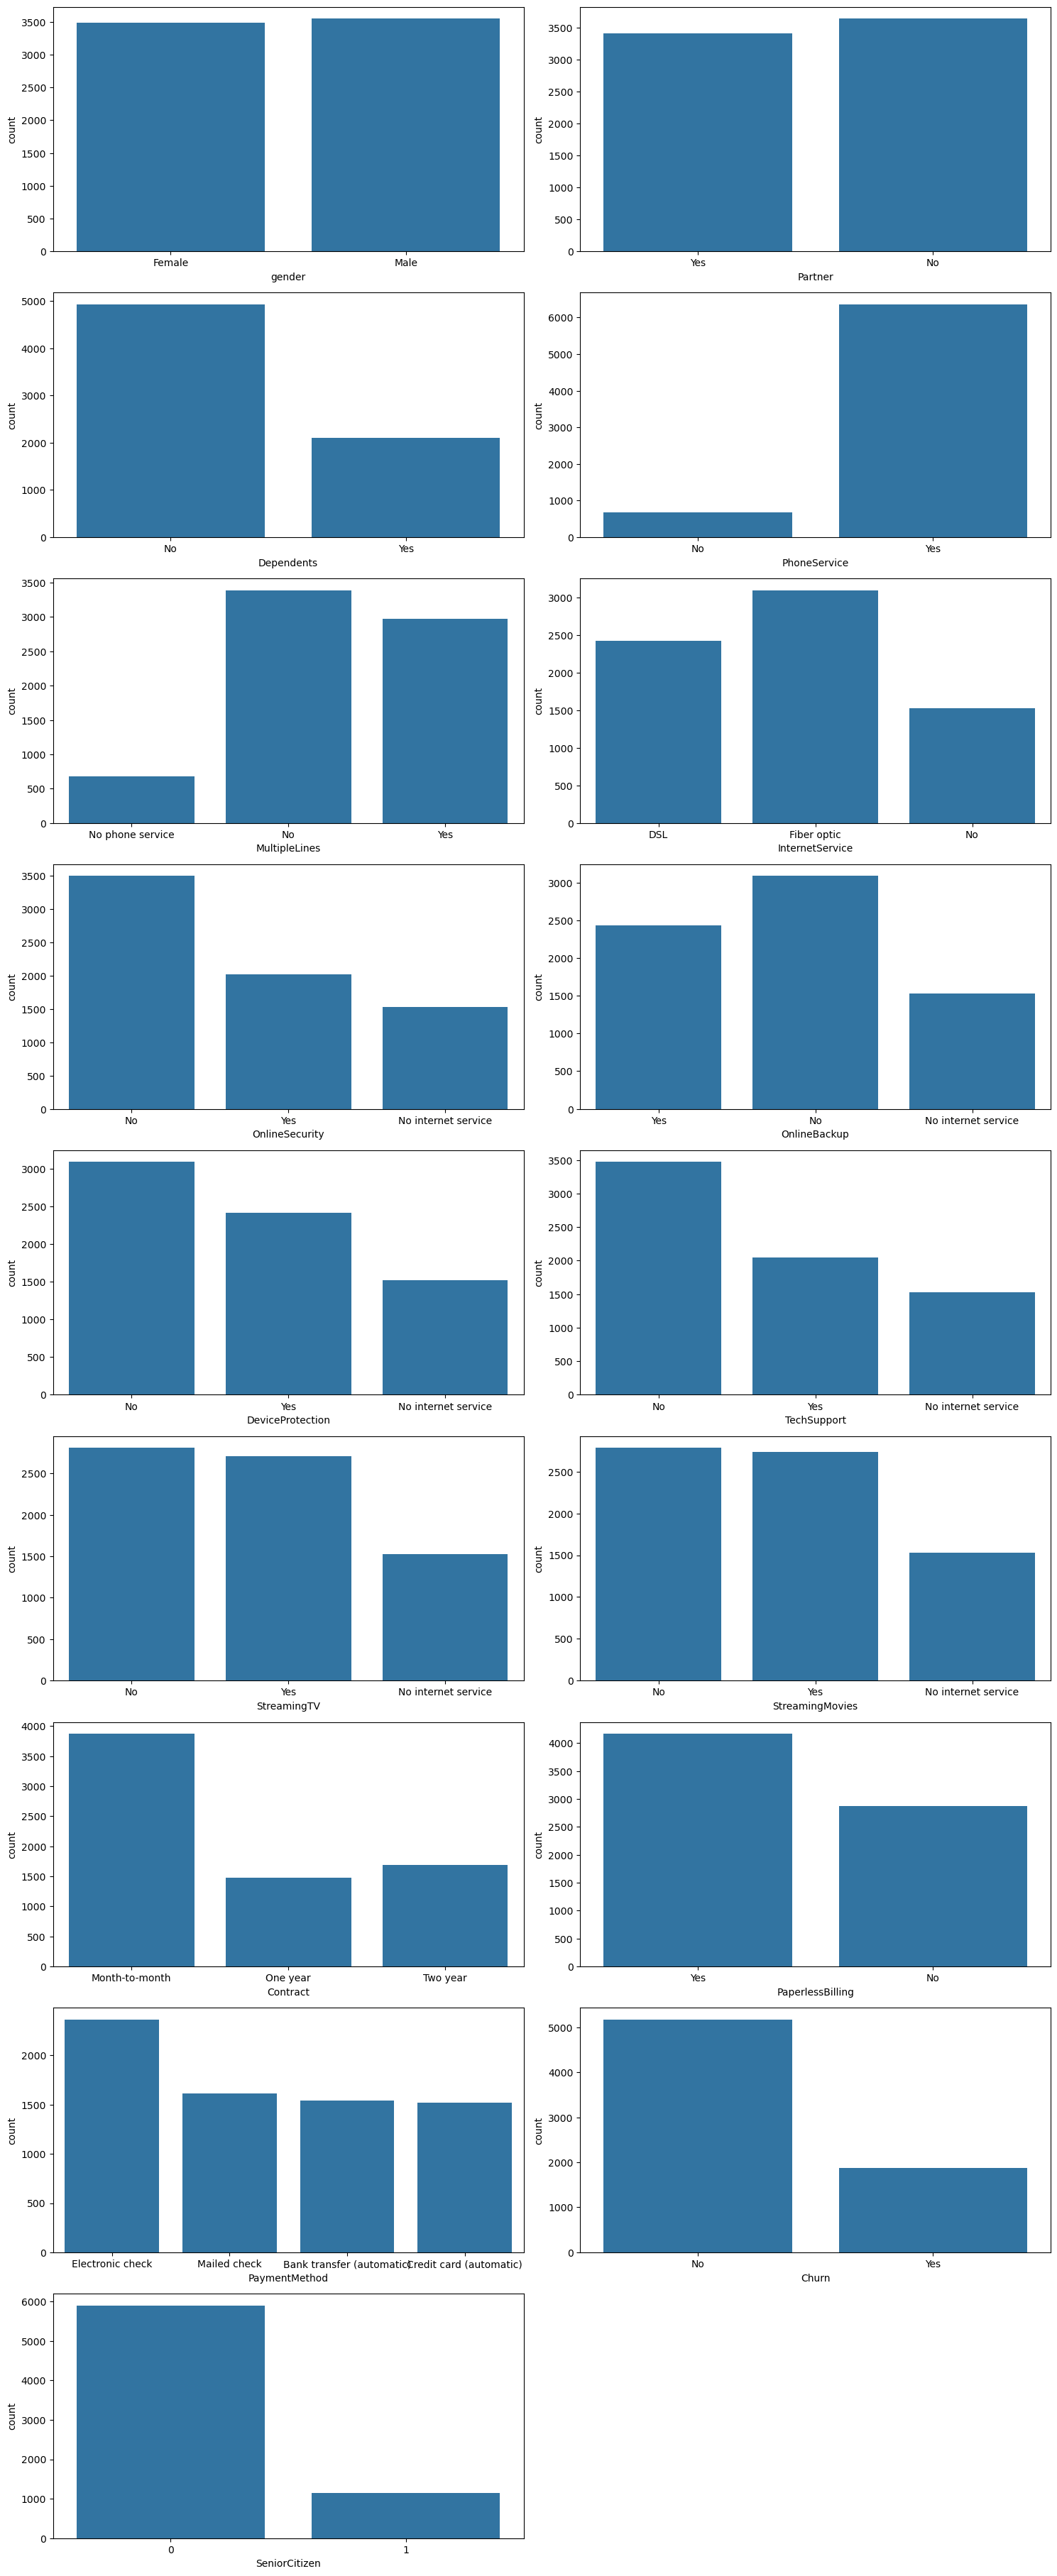

In [37]:
all_object_cols = df.select_dtypes(include='object').columns
cols_to_exclude = ['customerID', 'TotalCharges']
categorical_cols = [col for col in all_object_cols if col not in cols_to_exclude] + ['SeniorCitizen']

plt.figure(figsize=(15,40))
plot_num = 1
for col in categorical_cols:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

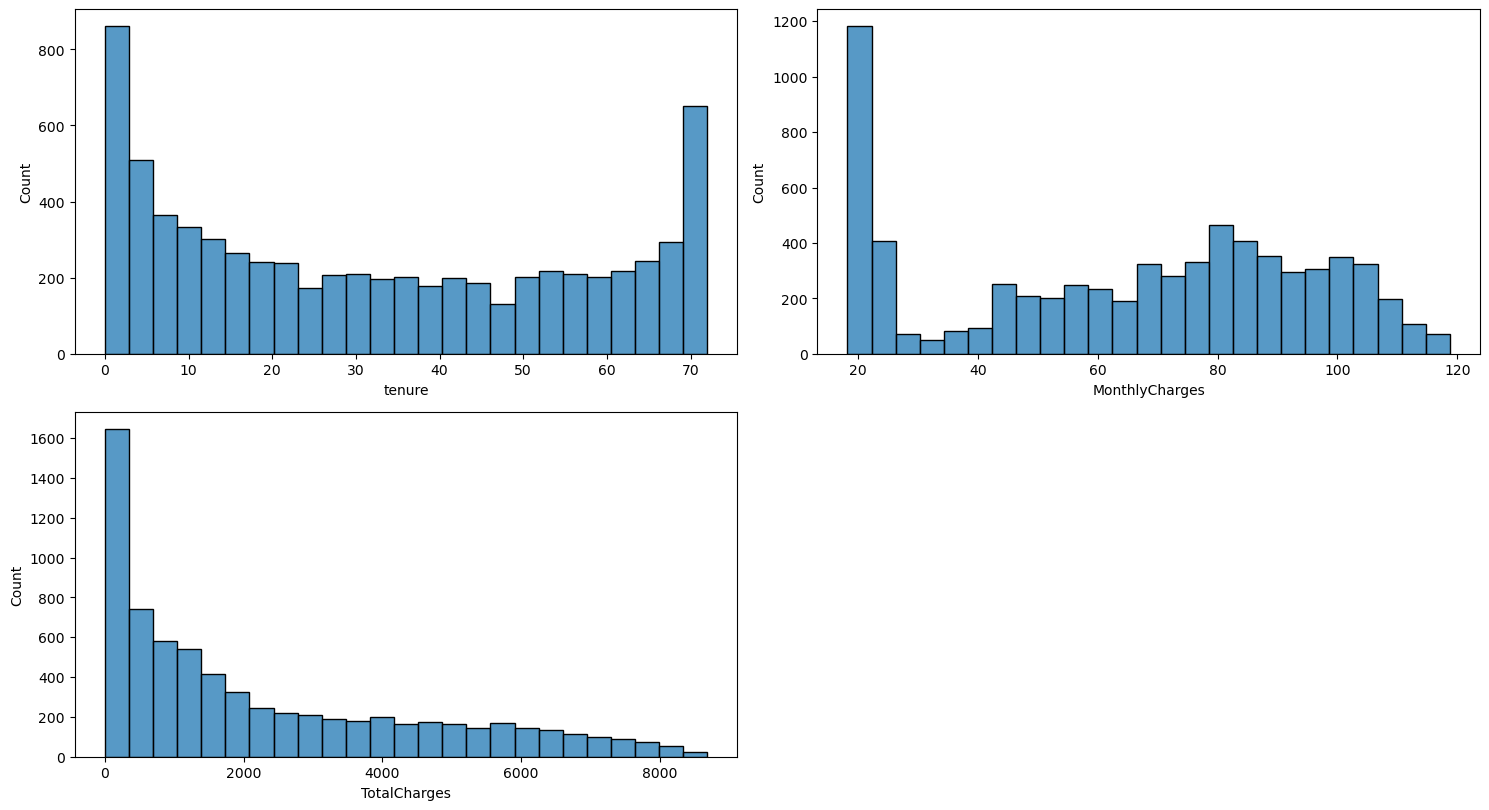

In [38]:
all_numeric_cols = df.select_dtypes(include='number').columns
cols_numeric_to_exclude = ['customerID', 'SeniorCitizen']
numeric_cols = [col for col in all_numeric_cols if col not in cols_numeric_to_exclude]

plt.figure(figsize=(15,40))
plot_num = 1
for col in numeric_cols:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

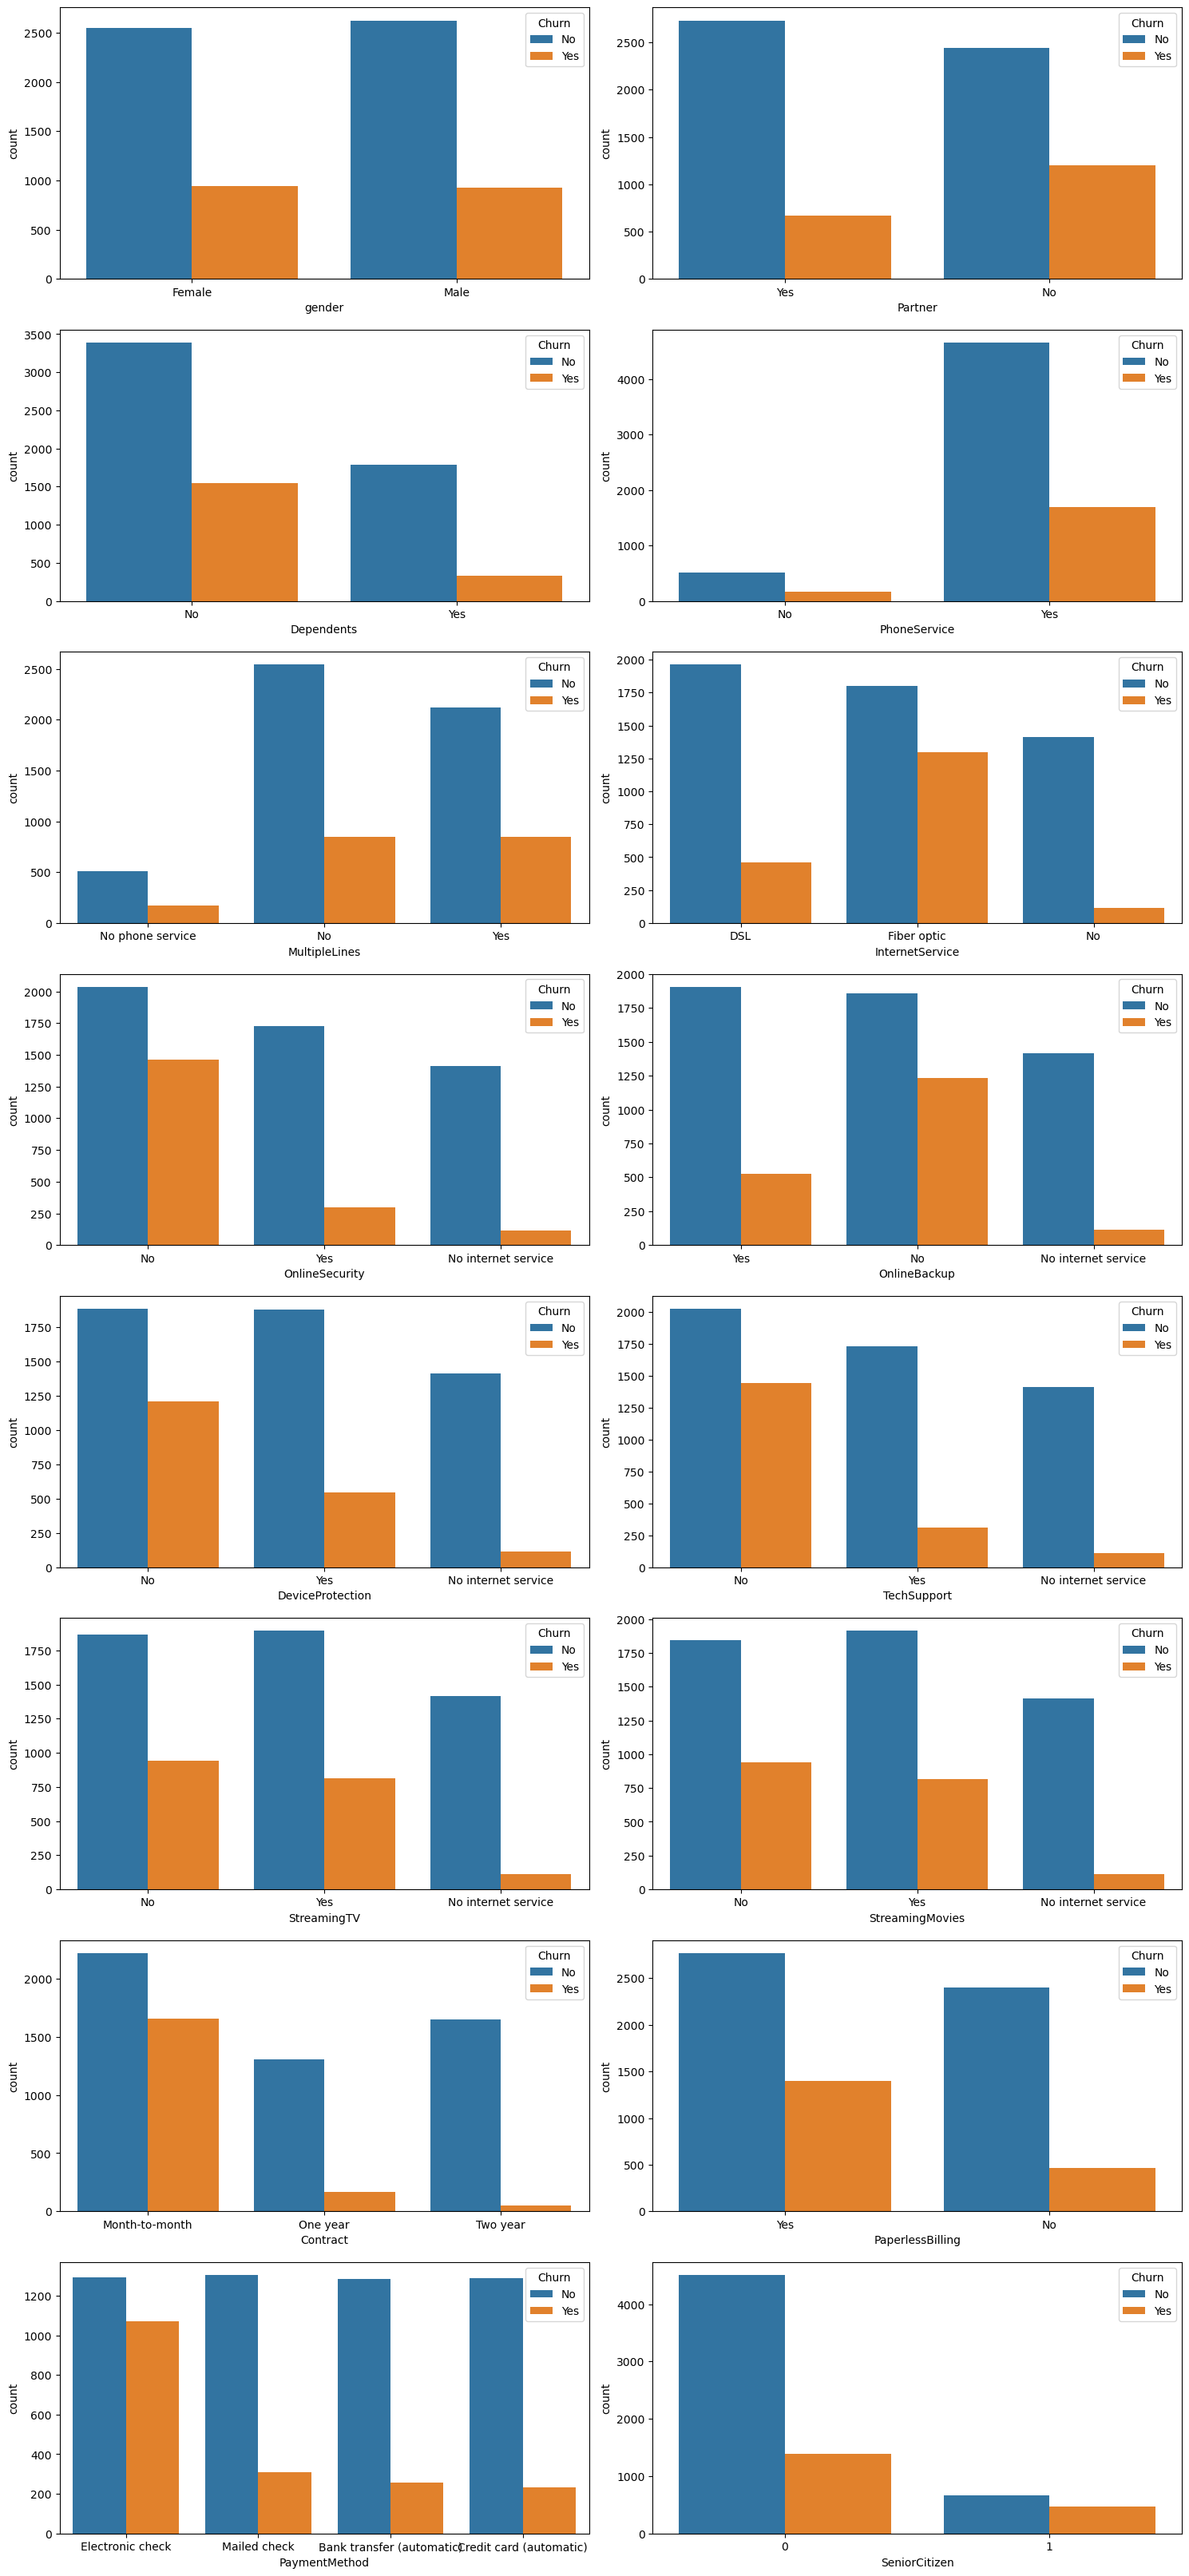

In [39]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in categorical_cols:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

In [41]:
# Label Encoding (0/1)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-Hot Encoding (dummy variables)
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'PaymentMethod'])

# Simplify binary:
binary_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

# Ordinal Encoding
df['Contract'] = df['Contract'].replace({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14376\1794751503.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14376\1794751503.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract'] = df['Contract'].replace({


In [42]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7041,8361-LTMKD,0,1,1,0,4,1,0,0,0,0,0,0,0,1,74.40,306.6,1,False,False,True,False,True,False,False,False,False,True
7042,3186-AJIEK,0,0,0,0,66,1,1,0,1,1,1,1,2,1,105.65,6844.5,0,True,False,False,False,True,False,True,False,False,False


In [43]:
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 4133
Before upsampling count of label 1 1501
After upsampling count of label 0 4133
After upsampling count of label 1 4133


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14376\2977901706.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [46]:
#Initialize the models
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),

    #Nearest Neighbour
    KNeighborsClassifier(),

    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [47]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, X, y, cv=5,
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
4,LogisticRegressionCV,80.400000,65.500000,55.000000,59.800000
2,GradientBoostingClassifier,80.300000,66.000000,53.100000,58.900000
5,RidgeClassifierCV,80.200000,66.500000,51.000000,57.700000
0,AdaBoostClassifier,80.100000,65.700000,52.400000,58.300000
3,RandomForestClassifier,78.900000,63.500000,48.100000,54.700000
7,XGBClassifier,78.100000,60.400000,51.000000,55.300000
1,BaggingClassifier,77.200000,59.500000,44.100000,50.600000
6,KNeighborsClassifier,76.200000,56.600000,44.600000,49.800000


In [48]:
final_model = LogisticRegressionCV(max_iter=1000, class_weight=None, random_state=42)
final_model.fit(X_train_s, y_train_s)  # gunakan hasil SMOTE

train_pred = final_model.predict(X_train_s)
test_pred = final_model.predict(X_test)

print("Akurasi:", final_model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, test_pred))
print("ROC-AUC:", roc_auc_score(y_test, test_pred))


Akurasi: 0.7785663591199432

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1041
           1       0.57      0.60      0.59       368

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC-AUC: 0.7201426304138997


In [49]:
final_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
final_model.fit(X_train_s, y_train_s)

train_pred = final_model.predict(X_train_s)
test_pred = final_model.predict(X_test)

print("Akurasi:", final_model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, test_pred))
print("ROC-AUC:", roc_auc_score(y_test, final_model.predict_proba(X_test)[:,1]))

Akurasi: 0.7743080198722498

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1041
           1       0.56      0.60      0.58       368

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.78      1409

ROC-AUC: 0.8203650336215179


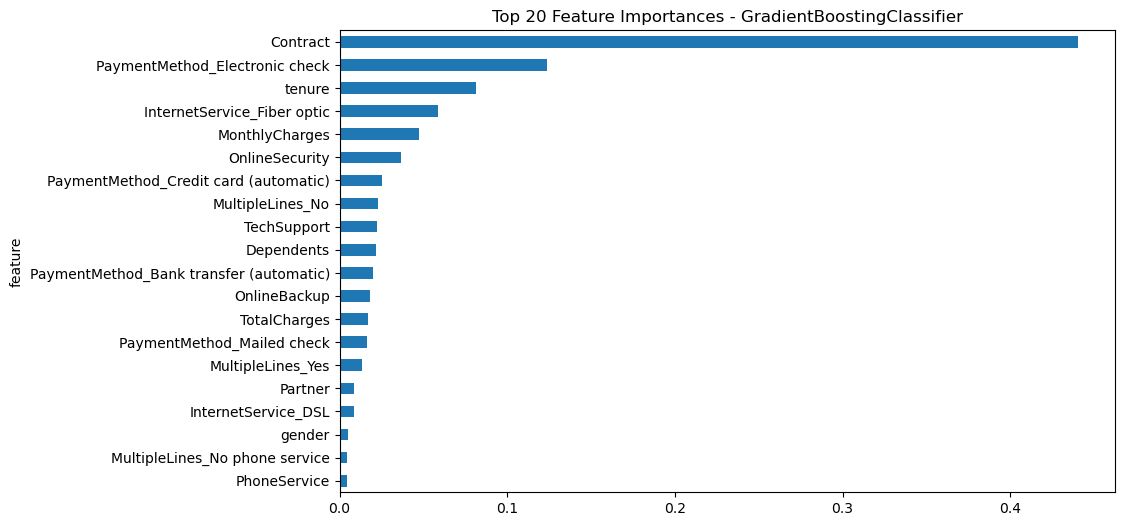

In [50]:
# Ambil importance
importances = final_model.feature_importances_

# Buat dataframe
feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Plot top 20
feature_importance_df.head(20).plot(kind="barh", x="feature", y="importance", figsize=(10,6), legend=False)
plt.title("Top 20 Feature Importances - GradientBoostingClassifier")
plt.gca().invert_yaxis()
plt.show()

In [51]:
selected_features = [
    "Contract",
    "tenure",
    "MonthlyCharges",
    "OnlineSecurity",
    "PaymentMethod_Electronic check",
    "PaymentMethod_Credit card (automatic)",
    "PaymentMethod_Bank transfer (automatic)",
    "PaymentMethod_Mailed check",
    "InternetService_DSL",
    "InternetService_Fiber optic",
    "InternetService_No"
]

X = df[selected_features]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Sebelum SMOTE:", y_train.value_counts().to_dict())
print("Sesudah SMOTE:", y_train_bal.value_counts().to_dict())

final_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=4
)

final_model.fit(X_train_bal, y_train_bal)

train_pred = final_model.predict(X_train_bal)
test_pred = final_model.predict(X_test)

print("\nClassification Report (Test Set):\n", classification_report(y_test, test_pred))
print("ROC-AUC:", roc_auc_score(y_test, test_pred))


Sebelum SMOTE: {0: 4139, 1: 1495}
Sesudah SMOTE: {0: 4139, 1: 4139}

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.88      0.80      0.83      1035
           1       0.55      0.69      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

ROC-AUC: 0.7438412255547806


In [ ]:
import joblib

# Save model
joblib.dump(final_model, "gradient_boosting_churn.pkl")

# Load model kembali
loaded_model = joblib.load("gradient_boosting_churn.pkl")

# Tes prediksi pakai model yang sudah di-load
test_pred_loaded = loaded_model.predict(X_test)
print("ROC-AUC (loaded):", roc_auc_score(y_test, test_pred_loaded))

'import joblib\n\n# Save model\njoblib.dump(final_model, "gradient_boosting_churn.pkl")\n\n# Load model kembali\nloaded_model = joblib.load("gradient_boosting_churn.pkl")\n\n# Tes prediksi pakai model yang sudah di-load\ntest_pred_loaded = loaded_model.predict(X_test)\nprint("ROC-AUC (loaded):", roc_auc_score(y_test, test_pred_loaded))'